# Project Two: Drought impacts on ecosystems 
Transpiration maps can give important information about the status of the ecosystem. Therefore, this kind of remote sensing data can be used to assess the severity of extreme weather events such as the drought and heat wave in Central and Northern Europe in 2018.

In this project, satellite-retrieved transpiration GeoTIF files for 2017 and 2018 will be opened, analyzed, compared and visualised. To enable further usage of the code with other GeoTIF files, a set of functions will be created.
The transpiration maps were made by the Sentinel-3 satellite in the peak season 2018 and in the reference year 2017 (https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-3).

This project is structured as follows:
In Step 1-5, functions are defined to perform different analysations and visualisations. In the following summary, the Sentinel-3 data will be opened and the functions will be runned only there, not in Step 1-5. At the end, the results are described and interpreted.

### Step 1
The Sentinel-3 transpiration datasets will be inspected utilising functions such as rasterio.

After importing the libraries, functions for every single parameter displayed in the analysation will be generated, to enable a detailed comparison between two datasets. Furthermore, a single function for the whole analysation will be created, as well as for the comparison.

In [59]:
# Import the necessary libraries:
import rasterio as rio
import numpy as np

# Make functions for every parameter (to be able to compare two datasets in detail):
def metadata(x):
    print('Metadata =', x.meta)
    print('----------------------------')
def pWidth(x):
    print('Width [Number of Pixels] =', x.width)
    print('----------------------------')
def pHeight(x):
    print('Height [Number of Pixels] =', x.height)
    print('----------------------------')
def NumPix(x):
    print('Number of Pixels =', x.width * x.height)
    print('----------------------------')
def CRS(x):
    print('CRS =', x.crs)
    print('----------------------------')
def BB(x):
    print('Boundaries =', x.bounds)
    print('----------------------------')
def gWidth(x):
    print('Width [Geographic Distance] =', (x.bounds[2] - x.bounds[0])/1000, 'km')
    print('----------------------------')
def gHeight(x):
    print('Height [Geographic Distance] =', (x.bounds[3] - x.bounds[1])/1000, 'km')
    print('----------------------------')
def NumBan(x):
    print('Number of Bands =', x.count)
    print('----------------------------')
def Index(x):
    print('Index =', x.indexes)
    print('----------------------------')


# Make a function for the whole analysation:
def analyze(x):
    print('ANALYSATION')
    print('----------------------------')
    print('Metadata =', x.meta)
    print('----------------------------')
    print('Width [Number of Pixels] =', x.width)
    print('----------------------------')
    print('Height [Number of Pixels] =', x.height)
    print('----------------------------')
    print('Number of Pixels =', x.width * x.height)
    print('----------------------------')
    print('CRS =', x.crs)
    print('----------------------------')
    print('Boundaries =', x.bounds)
    print('----------------------------')
    print('Width [Geographic Distance] =', (x.bounds[2] - x.bounds[0])/1000, 'km')
    print('----------------------------')
    print('Height [Geographic Distance] =', (x.bounds[3] - x.bounds[1])/1000, 'km')
    print('----------------------------')
    print('Number of Bands =', x.count)
    print('----------------------------')
    print('Index =', x.indexes)
    print('----------------------------')
    print()

# Make a function to compare the two datasets:
def comp(x, y):
    print('COMPARISON')
    print()
    print('Metadata:', metadata(x) == metadata(y))
    print()
    print('Width [Number of Pixels]:', pWidth(x) == pWidth(y))
    print()
    print('Height [Number of Pixels]:', pHeight(x) == pHeight(y))
    print()
    print('Number of Pixels =', NumPix(x) == NumPix(y))
    print()
    print('CRS:', CRS(x) == CRS(y))
    print()
    print('Bounding Box:', BB(x) == BB(y))
    print()
    print('Width [Geographic Distance]:', gWidth(x) == gWidth(y))
    print()
    print('Height [Geographic Distance]:', gHeight(x) == gHeight(y))
    print()
    print('Number of Bands:', NumBan(x) == NumBan(y))
    print()
    print('Index:', Index(x) == Index(y))
    print()

### Step 2
In this step, the two datasets will be visualised with a colorbar and a meaningful title.

After importing matplotlib, the plots will be generated.

In [60]:
# Import:
import matplotlib.pyplot as plt

# Make the plots:
def plot(x, y):
    plt.imshow(x, cmap='inferno')
    plt.title('Transpirationmap Europe x')
    plt.colorbar()
    plt.show()
    
    plt.imshow(y, cmap='inferno')
    plt.title('Transpirationmap Europe y')
    plt.colorbar()
    plt.show()

### Step 3 
To display the change between the two dates, a delta map will be computed with some simple descriptive statistics, and the map itself will be visualised.

Here, one single function will be defined to calculate the deltamap, statistics and the visualisation. This function includes a mask with all the zero values of one image in order to set the inf values to zero. Mean, minimum and maximum value, as well as the first, fifth 95th and 99th percentile will be displayed. In a last step, the deltamap will be visualised, but only in the range from the fifth to the 95th percentile. Otherwise, the map will be completely black, as there are extreme outliers (look at minimum and maximum values).

In [61]:
# The deltamap:
def deltam(x, y):
    deltamap = ((y - x)/x)*100
    
    # Set inf values to zero:
    mask = (x == 0)
    deltamap[mask] = 0
    
    # Some statistics:
    print('DELTAMAP STATISTICS')
    print('Mean =', np.nanmean(deltamap))
    print('Min =', np.nanmin(deltamap))
    print('Max =', np.nanmax(deltamap))
    p1 = np.nanpercentile(deltamap, 1)
    p5 = np.nanpercentile(deltamap, 5)
    p95 = np.nanpercentile(deltamap, 95)
    p99 = np.nanpercentile(deltamap, 99)
    print('First, fifth, 95th and 99th percentile:', p1,',', p5,',', p95,',', p99)
    
    # Visualise the deltamap. Leave out values on both ends:
    plt.imshow(deltamap, cmap = 'inferno', vmin=p5, vmax=p95)
    plt.title('Deltamap')
    plt.colorbar()
    plt.show()

### Step 4
For the country of Switzerland, statistics such as minimum, maximum and mean value and standard deviation of the changes will be calculated. 

Everything is packed in one function. First, the deltamap will be generated again, then, from the midpoint of Switzerland an approximated bounding box will be created (distances from the midpoint to the sides of the box were measured using map.geo.admin.ch). The coordinates of the midpoint will be transformed to pixel coordinates. Then, for the upper left and the lower right edge of the box, the according distances will be subtracted and added respectively from the midpoint. With the coordinates of these points, the extent in the deltamap can be visualised and statistics can be calculated for this specific area.

In [62]:
# Make a function to retrieve some statistics of the delta map in the area of Switzerland:
def CH(x, y):
    deltamap = ((y - x)/x)*100
    mask = (x == 0)
    deltamap[mask] = 0
    p5 = np.nanpercentile(deltamap, 5)
    p95 = np.nanpercentile(deltamap, 95)
    
    # Coordinates Middle of Switzerland in EPSG 32632: x = 440989.1831850347; Y = 5183353.013867427
    print('Midpoint of Switzerland in Pixel Coordinates =', rio.transform.rowcol(sept17.transform, 440989.1831850347, 5183353.013867427))
    
    # Bounding Box:  In Y-Direction -> 177km (590 Pixel). In X-Direction -> 115km (383.3 Pixel)
    x1 = int(1806-383.3)
    x2 = int(1806+383.3)
    y1 = int(856-590)
    y2 = int(856+590)
    print('x1 =', x1)
    print('x2 =', x2)
    print('y1 =', y1)
    print('y2 =', y2)
    
    # Define the extent of the bounding box in the deltamap:
    CH = deltamap[x1:x2, y1:y2]
    
    # Visualize the deltamap-extent:
    plt.imshow(CH, cmap = 'inferno', vmin=p5, vmax=p95)
    plt.title('Deltamap of Switzerland')
    plt.colorbar()
    plt.show()
    
    # Calculate statistics:
    print('DELTAMAP CH STATISTICS')
    print('Mean =', np.nanmean(CH))
    print('Min =', np.nanmin(CH))
    print('Max =', np.nanmax(CH))
    print('Std =', np.nanstd(CH))

### Step 5
A transect from the transpiration and delta maps (longitude) will be extracted and visualised.


In [63]:
def transect(x, y):
    # Define the transect extent for all the maps
    transect_x = x[0:3910, 1500:2000]
    transect_y = y[0:3910, 1500:2000]
    deltamap = ((y - x)/x)*100
    mask = (x == 0)
    deltamap[mask] = 0
    p5 = np.nanpercentile(deltamap, 5)
    p95 = np.nanpercentile(deltamap, 95)
    transect_d = deltamap[0:3910, 1500:2000]
    
    # Visualise the transects
    plt.imshow(transect_x, cmap = 'inferno')
    plt.title('Transect x')
    plt.colorbar()
    plt.show()
    
    plt.imshow(transect_y, cmap = 'inferno')
    plt.title('Transect y')
    plt.colorbar()
    plt.show()
    
    plt.imshow(transect_d, cmap = 'inferno', vmin=p5, vmax=p95)
    plt.title('Transect deltamap')
    plt.colorbar()
    plt.show()

### Summary
Here, all the created functions will be runned. To analyse new datasets, only this last bit has to be looked at as it shows all the information. The respective names of the files have to be changed to access the correct file.

ANALYSATION
----------------------------
Metadata = {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 3375, 'height': 3910, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(300.0, 0.0, 184107.712218393,
       0.0, -300.0, 5725293.65196346)}
----------------------------
Width [Number of Pixels] = 3375
----------------------------
Height [Number of Pixels] = 3910
----------------------------
Number of Pixels = 13196250
----------------------------
CRS = EPSG:32632
----------------------------
Boundaries = BoundingBox(left=184107.712218393, bottom=4552293.65196346, right=1196607.712218393, top=5725293.65196346)
----------------------------
Width [Geographic Distance] = 1012.5000000000001 km
----------------------------
Height [Geographic Distance] = 1173.0 km
----------------------------
Number of Bands = 1
----------------------------
Index = (1,)
----------------------------

ANALYSATION
----------------------------
Metadata = {'driver': 'GTiff', 'dtype': 'fl

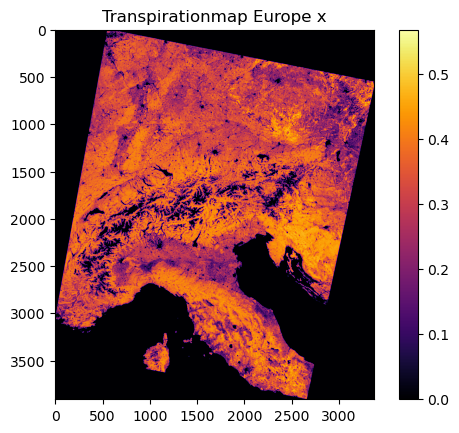

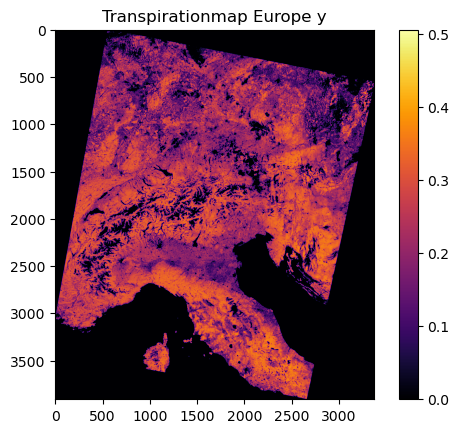

C:\Users\laura\AppData\Local\Temp\ipykernel_25164\3631581017.py:3: RuntimeWarning: divide by zero encountered in true_divide
  deltamap = ((y - x)/x)*100
C:\Users\laura\AppData\Local\Temp\ipykernel_25164\3631581017.py:3: RuntimeWarning: invalid value encountered in true_divide
  deltamap = ((y - x)/x)*100


DELTAMAP STATISTICS
Mean = -15.460007
Min = -100.0
Max = 1500289.6
First, fifth, 95th and 99th percentile: -100.0 , -79.45004081726074 , 0.0 , 32.71228397369364


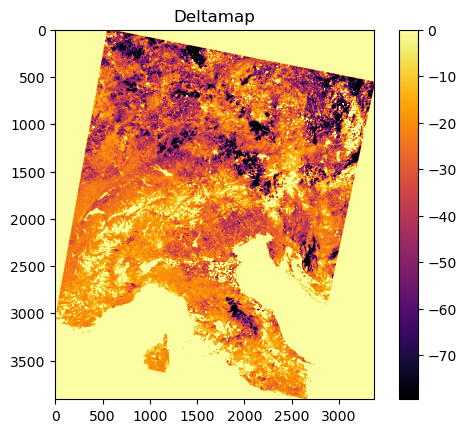

Midpoint of Switzerland in Pixel Coordinates = (1806, 856)
x1 = 1422
x2 = 2189
y1 = 266
y2 = 1446


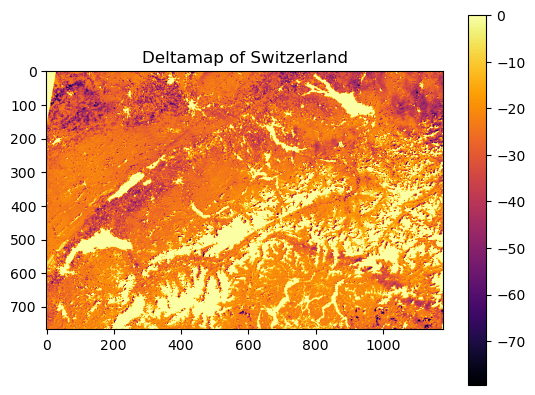

DELTAMAP CH STATISTICS
Mean = -20.325098
Min = -100.0
Max = 41523.152
Std = 73.22843


C:\Users\laura\AppData\Local\Temp\ipykernel_25164\4102902781.py:5: RuntimeWarning: divide by zero encountered in true_divide
  deltamap = ((y - x)/x)*100
C:\Users\laura\AppData\Local\Temp\ipykernel_25164\4102902781.py:5: RuntimeWarning: invalid value encountered in true_divide
  deltamap = ((y - x)/x)*100


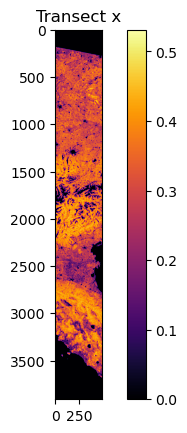

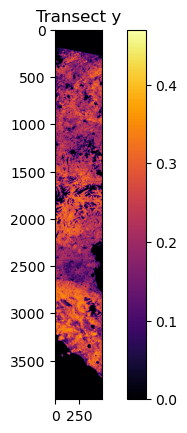

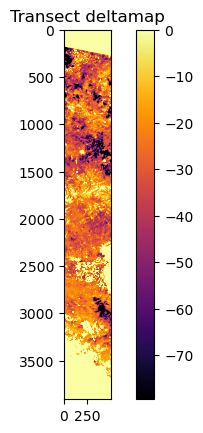

In [64]:
# Step 1: Analyze and compare the datasets:
with rio.open('sept17.tiff') as sept17:
    analyze(sept17)
    sept17_image = sept17.read(1)
with rio.open('sept18.tiff') as sept18:
    analyze(sept18)
    sept18_image = sept18.read(1)
comp(sept17, sept18)

# Step 2: Visualise the datasets:
plot(sept17_image, sept18_image)

# Step 3: Generate the deltamap with statistics and visualise it:
deltam(sept17_image, sept18_image)

# Step 4: Calculate statistics for the deltamap in the extent of Switzerland:
CH(sept17_image, sept18_image)

# Step 5: Visualise transects from each map:
transect(sept17_image, sept18_image)

### Interpretation of the results
#### Step 1
The analysation is long but looks somewhat clear. The comparison part always first puts out the parameter itself before stating if it is the same or not. This can be useful, but it also takes away from the clear structure and makes it difficult to extract information efficiently.

#### Step 2
The maps show where the transpiration rates are high (yellow-orange) and where they are low (black-violet). The colorbar "inferno" not only fits well from the name, but also shows intuitively well interpretable colors. The transpiration map from 2018 is much darker, which makes sense, as the heatwave and the drought peaked at this time. The ocean, lakes and the alps are in both maps very dark, because there are little to no plants.

#### Step 3
The deltamap statistics show very high and very low values. This becomes particularly clear when one takes a look at the percentiles. The highest value is 1'500'289.6, and the value of the 99th percentile is 32.7. If the deltamap was displayed with the outliers, it would be completely black. Here, the dark areas show the most changes between the two years. Where the area is yellow (value of 0), the two transpiration maps don't differ. This can be seen again in the ocean, the lakes and the alps.

#### Step 4
The deltamap of Switzerland is only an approximation, as it is in the shape of a rectangle box and not in the shape of the country itself. Therefore, some of the adjacent area is included in the calculations of the statistics. Again, there are extreme outliers (maximum value is 41'523.152). Accordingly, the plot is displayed only with the values from the fifth to the 95th percentile. It is well visible that the alps and the lakes didn't change, whereas in the northern half of Switzerland, especially in the area of Jura and Zurich, rather big changes in transpiration took place.

#### Step 5
These extents of the transects try to show as much area as possible, from the north as well as from the south of Europe. In the transect of 2017, the lowest transpiration was in the area between Milano, Bologna and Venice. In the north, transpiration was also not very high, it gets gradually lower. In the transect of 2018, the already darker areas are now very dark, nearly black. Additionally, large parts in Austria and Germany darkened a lot. There is no longer a gradient, it is just mainly dark with few lighter spots. Finally, the transect of the deltamap shows the darkest area exactly in Austria. The biggest change within this extent happened there.